# AB-тестирование (пекарни). ДЗ в рамках курса Scypro "Аналитик данных"


Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий на сайт пекарни, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?



## Задание 1. Выбери окно конверсии, используя исторические данные 



In [1]:
import pandas as pd

In [2]:
#назначаем индекс на первую колонку
historical_data = pd.read_csv('investigate_window.csv', index_col = 0 )

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
historical_data.dtypes

user_id                  int64
main_page_viewed_at     object
order_completed_at      object
time_to_order          float64
dtype: object

In [5]:
#Меняем формат даты
historical_data.main_page_viewed_at = pd.to_datetime(historical_data.main_page_viewed_at)
historical_data.order_completed_at = pd.to_datetime(historical_data.order_completed_at)

In [6]:
historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Определить какой перцентиль соответствует недельному окну конверсии**


In [7]:
import numpy as np

In [8]:
#недельное окно конверсии соответствует 95%-перцентилю
perc_95 = round(np.percentile(historical_data['time_to_order'], 95),1)
perc_95

7.1

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

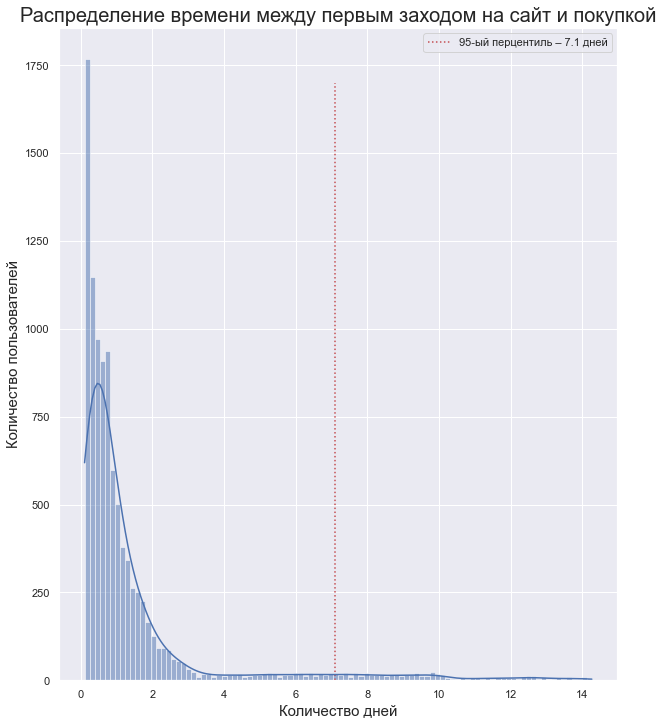

In [10]:
#через histplot
plt.figure(figsize = (10,12))
sns.set()
sns.histplot(x = historical_data['time_to_order'], kde = True, bins = 100)
plt.vlines(perc_95, ymin = 0, ymax = 1700,  linestyles ="dotted", colors ="r", label = f'95-ый перцентиль – {perc_95} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой', fontsize = 20)
plt.xlabel('Количество дней', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


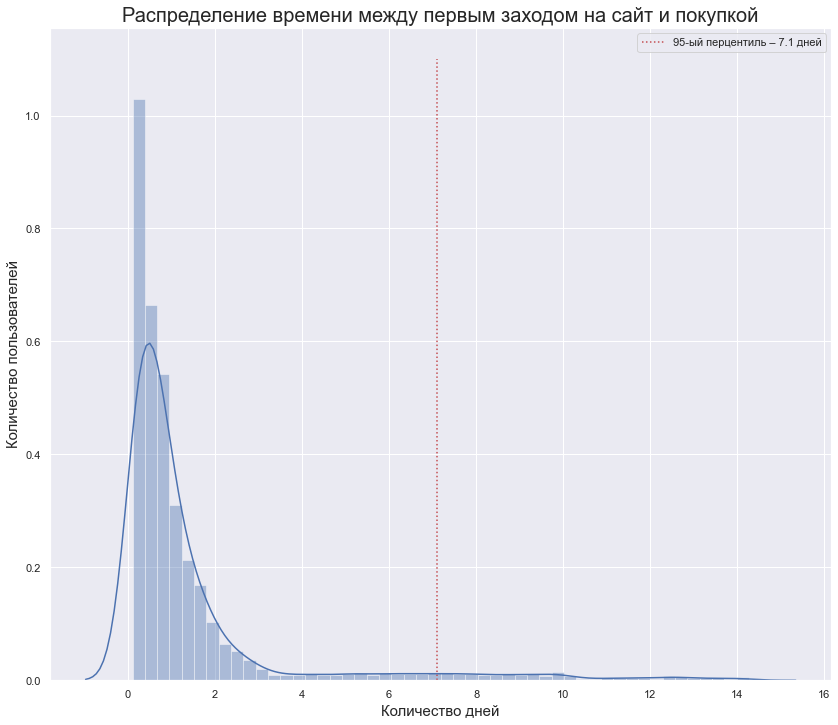

In [11]:
#или через distplot
plt.figure(figsize = (14,12))
sns.distplot(x = historical_data['time_to_order'])
plt.vlines(perc_95, ymin = 0, ymax = 1.100,  linestyles ="dotted", colors ="r", label = f'95-ый перцентиль – {perc_95} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой', fontsize = 20)
plt.xlabel('Количество дней', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize = 15)
plt.legend()
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 


In [13]:
data = pd.read_csv('bakery_ab_test.csv', index_col = 0 )
data.head()

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc


**Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
  

In [14]:
def plot_segment_distribution(df, segment_list, test_factor_column):
    for segment in segment_list:
        agg_data = df.groupby(by=[test_factor_column, segment]).user_id.count().reset_index()
        #чтобы шрифт на графиках был покрупнее
        with sns.plotting_context("talk"): sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor_column, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    kind = "bar",
                    data = agg_data,
                    saturation = .5,
                    height = 8, aspect = 2, palette = "flare")

**Посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**

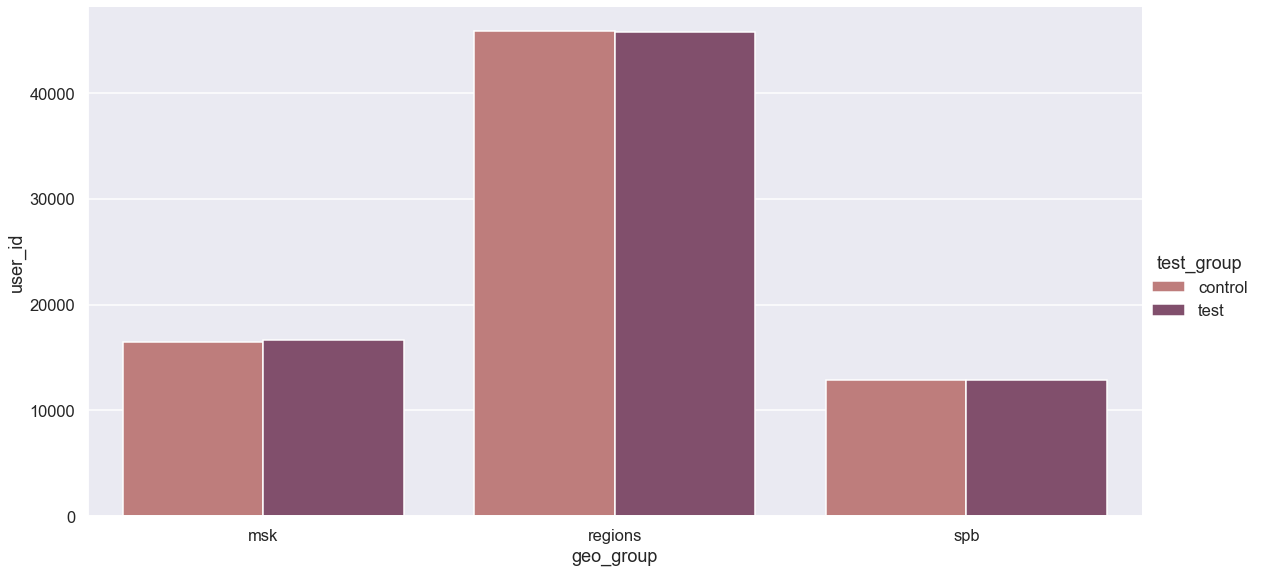

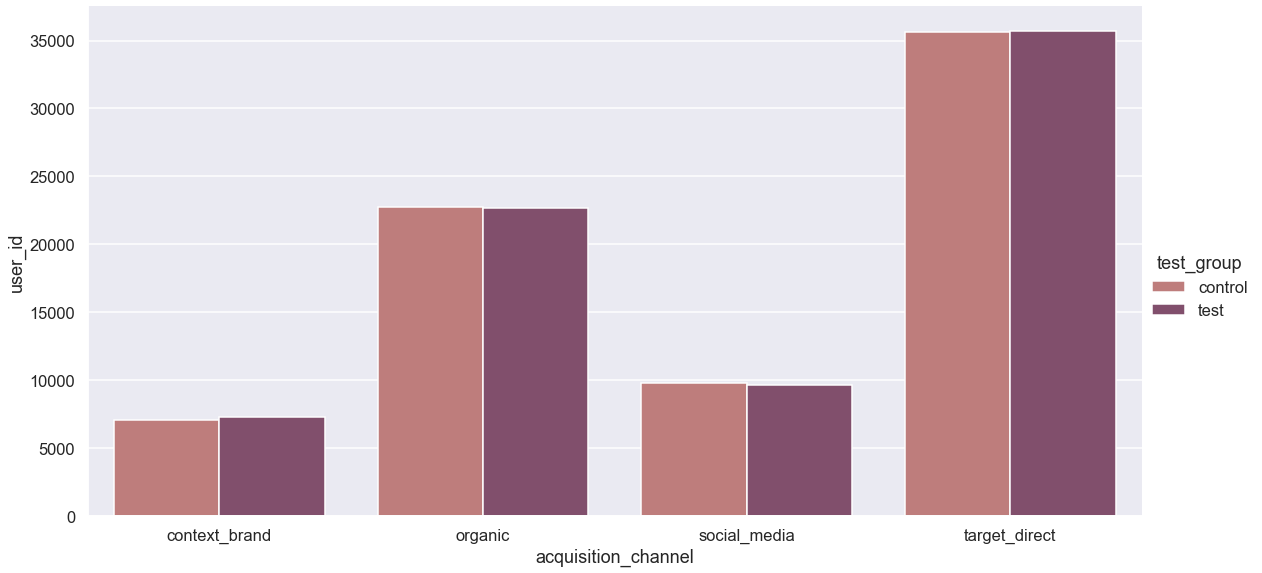

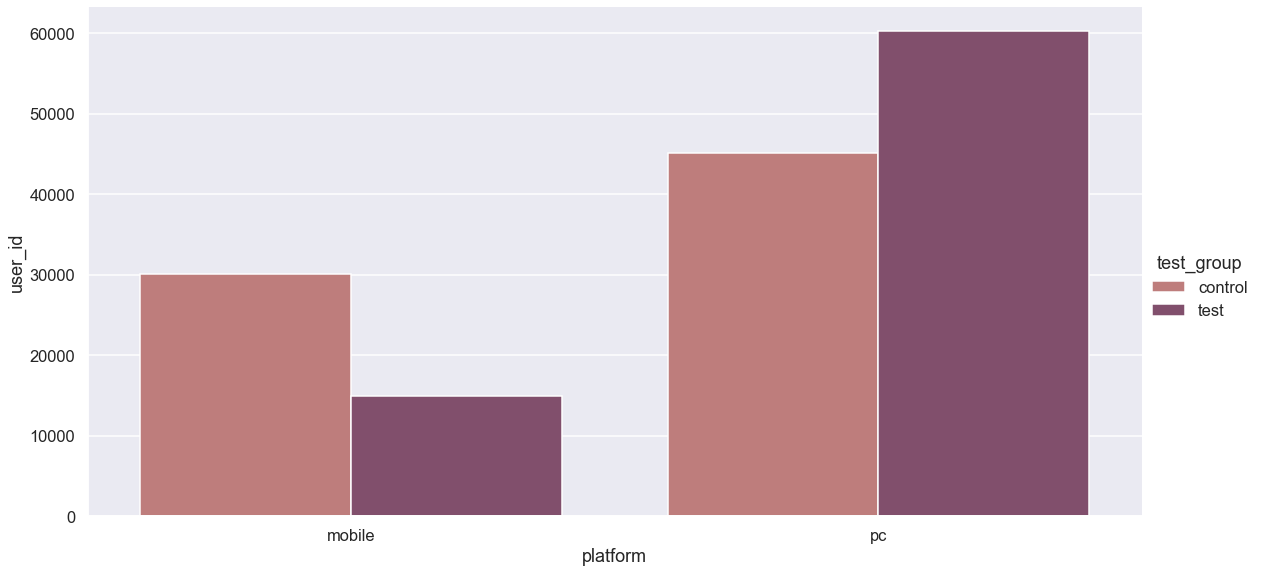

In [15]:
plot_segment_distribution(data, ['geo_group', 'acquisition_channel', 'platform'], 'test_group')

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**


In [16]:
#Пользователи, сгруппированные по тест-фактору
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum', \
                                                                      'purchase_amount': 'mean' })

metrics['conversion'] = metrics['within_window'] / metrics['user_id']
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,0.305784
1,test,75273,24427,5394.771589,0.324512


In [17]:
#Пользователи, сгруппированные по тест-фактору и платформе
metrics_pc_mob = data.groupby(by = ['test_group', 'platform'], as_index= False).agg({'user_id': 'count', 'within_window': 'sum', \
                                                           'purchase_amount': 'mean' })
metrics_pc_mob['conversion'] = metrics_pc_mob['within_window'] / metrics_pc_mob['user_id']

In [18]:
#Пользователи, заходившие с ПК
metrics_pc = metrics_pc_mob.query("platform == 'pc'").copy()
metrics_pc

,test_group,platform,user_id,within_window,purchase_amount,conversion
1,control,pc,45112,13732,5200.121803,0.304398
3,test,pc,60317,19659,5401.003720,0.325928


In [19]:
#Пользователи, заходившие с мобильного
metrics_mobile = metrics_pc_mob.query("platform == 'mobile'").copy()
metrics_mobile

,test_group,platform,user_id,within_window,purchase_amount,conversion
0,control,mobile,30098,9266,5127.505438,0.307861
2,test,mobile,14956,4768,5369.075812,0.318802


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

In [20]:
import statsmodels.stats.proportion as proportion

In [21]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])

In [22]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])

In [23]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [24]:
alpha = 0.05
def check_pvalue(pvalue, a):
    if pval < a:
        print('Pезультат эксперимента можно считать статзначимым. Нулевая гипотеза отклоняется\n\n')
    else:
        print('Разница в значениях тестовой и контрольной группы случайна. Нулевая гипотеза не отклоняется\n\n')

**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

In [25]:
print('Для всех пользователей, попавших в тест:') 
check_pvalue(pval, alpha) 

print('Для пользователей, заходивших с ПК:')
check_pvalue(pval_pc, alpha)

print('Для пользователей, заходивших с мобильного:')
check_pvalue(pval_mobile, alpha)


Для всех пользователей, попавших в тест:
Pезультат эксперимента можно считать статзначимым. Нулевая гипотеза отклоняется


Для пользователей, заходивших с ПК:
Pезультат эксперимента можно считать статзначимым. Нулевая гипотеза отклоняется


Для пользователей, заходивших с мобильного:
Pезультат эксперимента можно считать статзначимым. Нулевая гипотеза отклоняется




## Задание 4. Вычисли мощность теста


In [26]:
import statsmodels.stats.power as smp

In [27]:
chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [28]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [29]:
conversion_control = metrics.conversion.values[0]
conversion_test = metrics.conversion.values[1]
nobs = min(metrics.user_id)

In [30]:
conversion_control_mobile = metrics_mobile.conversion.values[0]
conversion_test_mobile = metrics_mobile.conversion.values[1]
nobs_mobile = min(metrics_mobile.user_id)

In [31]:
conversion_control_pc = metrics_pc.conversion.values[0]
conversion_test_pc = metrics_pc.conversion.values[1]
nobs_pc = min(metrics_pc.user_id)

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [32]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), # разница коэффициентов конверсии
                                               nobs = nobs, # размер выборки
                                               alpha = pval, # значение ошибки первого рода на наших данных
                                               power = None) # функция вернет значение, указаное как None


In [33]:
mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                               nobs = nobs_mobile,
                                               alpha = pval_mobile, 
                                               power = None)


In [34]:
pc_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), 
                                               nobs = nobs_pc, 
                                               alpha = pval_pc, 
                                               power = None)


In [35]:
#Создадим функцию для проверки мощности
alpha_power = 0.8
def check_power(power, a_power):
    if power < a_power:
        print(f'Мощность достаточно низкая: с вероятностью более, чем {round(100*(1-power))}% мы бы не увидели статистически значимых отличий там, где они существуют. \n\n')
    else:
        print('Moщность высокая\n\n')

In [36]:
#Проверим мощности
print('Для всех пользователей, попавших в тест:') 
check_power(power, alpha_power) 

print('Для пользователей, заходивших с ПК:')
check_power(pc_power, alpha_power)

print('Для пользователей, заходивших с мобильного:')
check_power(mobile_power, alpha_power)


Для всех пользователей, попавших в тест:
Moщность высокая


Для пользователей, заходивших с ПК:
Moщность высокая


Для пользователей, заходивших с мобильного:
Мощность достаточно низкая: с вероятностью более, чем 48% мы бы не увидели статистически значимых отличий там, где они существуют. 




# Вывод:
Мощность сегмента пользователей, зашедших с мобильного, мала, а значит текущего количества наблюдений недостаточно

In [71]:
#Узнаем необходимое количество пользователей, зашедших с мобильного, для проведения теста с заданным уровнем мощности
size_of_each_test_group_mobile = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                               nobs = None, 
                                               alpha = alpha, 
                                               power = 0.8) 
print('Необходимый размер выборки для эксперимента - {:.0f}'.format(2*size_of_each_test_group))

Необходимый размер выборки для эксперимента - 52774


In [69]:
data.groupby('platform').user_id.count()

platform
mobile     45054
pc        105429
Name: user_id, dtype: int64

# Вывод:
Текущее количество пользователей, зашедших с мобильного, составляет 45054, что недостаточно. Необходимый размер выборки для эксперимента - 52774.


## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**

In [38]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [39]:
test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data.loc[(data['test_group'] == 'test') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = data.loc[(data['test_group'] == 'control') & (data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = data.loc[(data['test_group'] == 'test') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = data.loc[(data['test_group'] == 'control') & (data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**


In [40]:
boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [41]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [42]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [43]:
borders = np.percentile(boot, [2.5, 97.5])
borders_pc = np.percentile(boot_pc, [2.5, 97.5])
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**


In [44]:
def bootstrap_plot(data_bootstrap_array, conf_interval_array):
    fig, ax = plt.subplots(figsize = (10,12))
    plt.title('Bootstrap-распределение разниц среднего чека', fontsize = 15)
    sns.histplot(x = data_bootstrap_array,  kde = True)
    plt.vlines(0, # отрисуем линию на уровне ноля
               ymin = 0, 
               ymax = 550, 
               linestyles= '--', 
               colors = 'red')
    plt.fill_between(x = conf_interval_array , 
                      y1 = 0, 
                      y2 = 550, 
                      edgecolor='g', 
                      facecolor='g', 
                      alpha=0.3,
                      label = '95%-доверительный интервал')
    plt.legend()
    plt.show()

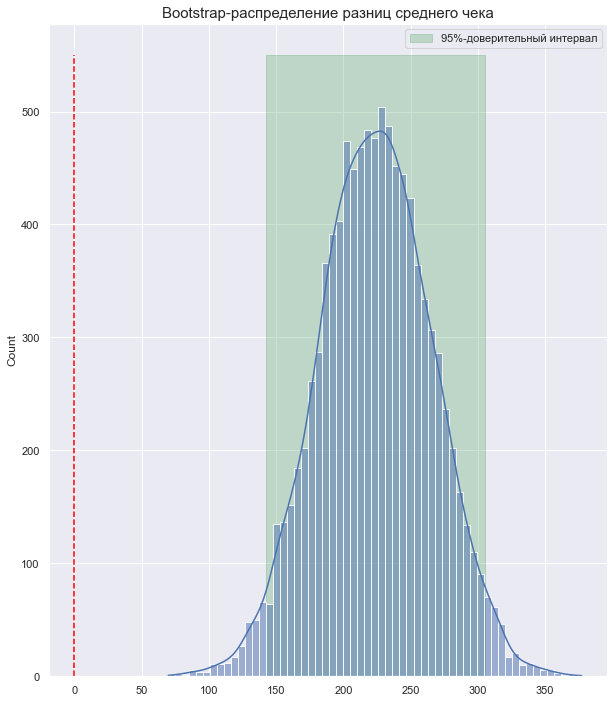

In [45]:
bootstrap_plot(boot, borders)

# Вывод:
В общей группе пользователей, участвующих в тесте, статистически значимое изменение по среднему чеку обнаружено (0 не вошел в доверительный интервал). При этом доверительный интервал находится правее от 0, а значит можно сказать, что метрика выросла.

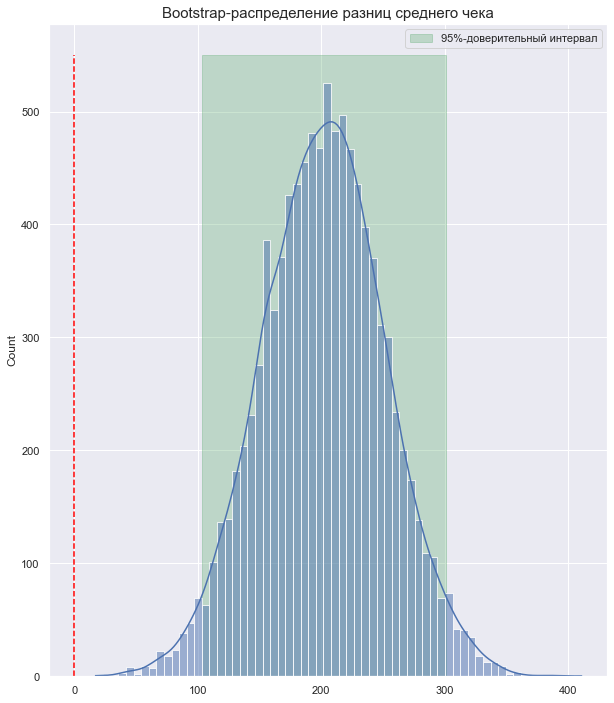

In [46]:
bootstrap_plot(boot_pc, borders_pc)

# Вывод:
В группе пользователей, зашедших с ПК, статистически значимое изменение по среднему чеку обнаружено (0 не вошел в доверительный интервал). При этом доверительный интервал находится правее от 0, а значит можно сказать, что метрика выросла.

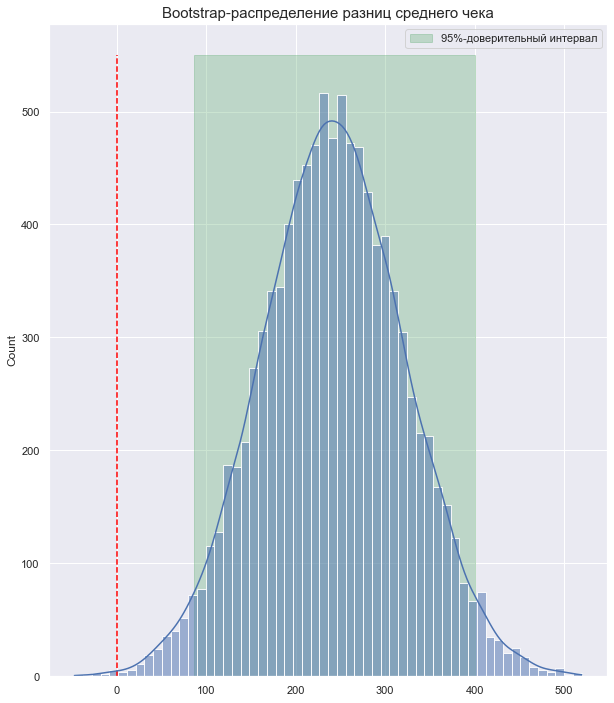

In [47]:
bootstrap_plot(boot_mobile, borders_mobile)

# Вывод:
В группе пользователей, зашедших с мобильного, статистически значимое изменение по среднему чеку обнаружено (0 не вошел в доверительный интервал). При этом доверительный интервал находится правее от 0, а значит можно сказать, что метрика выросла.

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

# Вывод:
По итогам проведенного теста обнаружено, что для разных сегментов:
- конверсия из визита в покупку с окном в 7 дней повысилась
- средний чек вырос.

Также обнаружено неравномерное распределение пользователей между тестовыми группами по использованной платформе (ПК или мобильный). 

Проанализированы мощности для разных сегментов: мощности тестов для всех пользователей и пользователей, зашедших с ПК, оказались высокими, а вот мощность теста для пользователей, зашедших с мобильного, оказалась достаточно низкой. 
Это значит, что текущего количества пользователей, зашедших с мобильного, недостаточно для подведения итогов эксперимента.

Таким образом, необходимо продолжить наблюдения среди пользователей, зашедших с мобильного, набрать необходимое количество(52774, на текущий момент 45054), дождаться закрытия конверсионного окна в 7 дней и подвести итоги.